In [1]:
# this setup is a graphic configuration 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as graph
%matplotlib inline 
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams['font.family'] = "DejaVu Sans"
graph.rcParams['font.size'] = "14"
graph.rcParams['image.cmap'] = "rainbow"
graph.rcParams['axes.facecolor'] = 'gray'
graph.rcParams['figure.facecolor'] = 'white'
import numpy as np
import pandas as pd

dataset = pd.read_csv('Data/traffic_by_hour.csv')

###
# BELOW, REPLACE <printDataHere> WITH print(dataset.head()) TO PREVIEW THE DATASET ---###
###
print(dataset.head())

          00         01         02  ...         21         22         23
0  43.606554  24.714152   9.302911  ...  64.096617  59.582208  42.819702
1  44.584835  19.604348   9.480832  ...  61.359132  50.287926  40.383544
2  33.208561  29.584181  27.207633  ...  61.140163  61.446353  58.811576
3  35.026655  20.367550  21.445285  ...  60.139054  61.639772  44.670988
4  40.163194  19.936328  18.066480  ...  51.909886  61.674395  46.727170

[5 rows x 24 columns]


In [2]:
### 
# REPLACE THE <addCallToTranspose> BELOW WITH transpose
###
dataset_T = np.transpose(dataset)

print(dataset_T)

            0          1          2          3          4          5
00  43.606554  44.584835  33.208561  35.026655  40.163194  49.169391
01  24.714152  19.604348  29.584181  20.367550  19.936328  24.455188
02   9.302911   9.480832  27.207633  21.445285  18.066480  12.391360
03   3.694417  13.476905  11.243233   7.449592  12.109940  10.705337
04   9.324995  14.465224  12.229805   2.232115  10.878539   6.511395
05   9.837653   6.014083   5.072605   8.104623   9.766027  21.785345
06   7.960157  22.679671   6.111838   9.095805  19.504761  19.257321
07  21.292098  18.192898  26.176792  19.499463  10.313875  23.273782
08  27.714126  28.783762  35.246483  37.689567  28.509128  29.661006
09  46.709211  40.113972  38.220432  33.907093  30.809746  34.608582
10  39.111999  46.149334  30.902951  31.018349  36.326509  38.679585
11  47.428745  43.753611  50.462422  43.379814  45.893941  48.254502
12  43.459394  45.312618  41.865849  40.330625  31.512743  44.585404
13  39.046579  34.654569  43.62873

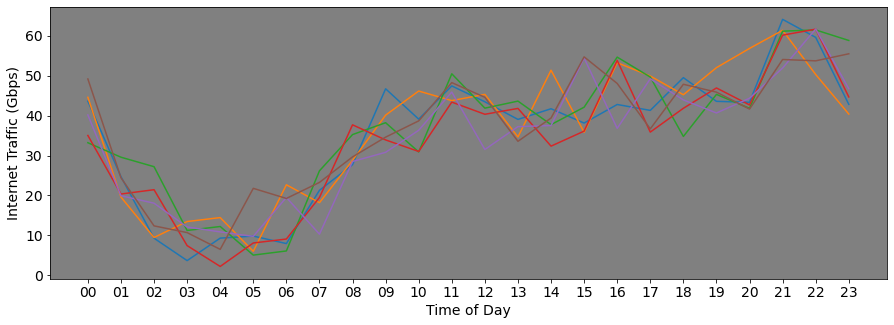

In [3]:
# Let's visualise the data!

###
# REPLACE <addSampleHere> BELOW WITH sample
###
for sample in range(0, dataset_T.shape[1]):
    graph.plot(dataset.columns.values, dataset_T[sample])

graph.xlabel('Time of Day')
graph.ylabel('Internet Traffic (Gbps)')
graph.show()

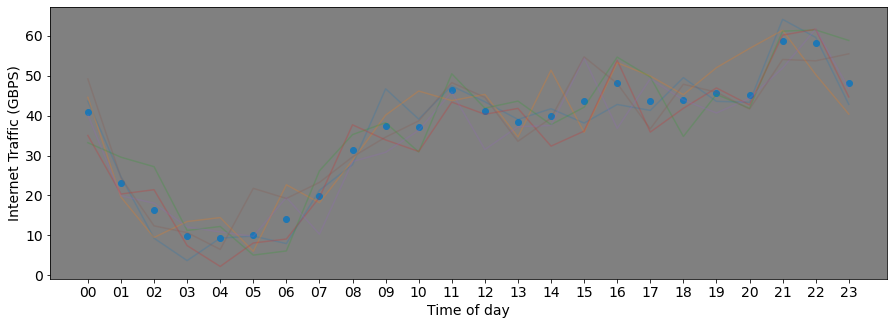

In [4]:
#we want to look at the mean values for each hour

hours = dataset.columns.values

###
# REPLACE THE <replaceWithHour>'s BELOW WITH hour
###
train_Y = [dataset[hour].mean() for hour in hours] #this will be our out outcome we measure label -ammount of internet traffic
train_X = np.transpose([int(hour) for hour in hours]) #this is our features - time of day 

#this make our graph
graph.scatter(train_X, train_Y)
for sample in range(0, dataset_T.shape[1]):
    graph.plot(hours, dataset_T[sample], alpha=0.25)
graph.xlabel('Time of day')
graph.ylabel('Internet Traffic (GBPS)')
graph.show()

In [6]:
# Polynomials of degree 1 are linear!
# Lets include this one just for comparison

###
# REPLACE THE <replaceWithDegree> BELOW WITH 1
###
poly_1 = np.polyfit(train_X, train_Y, 1)

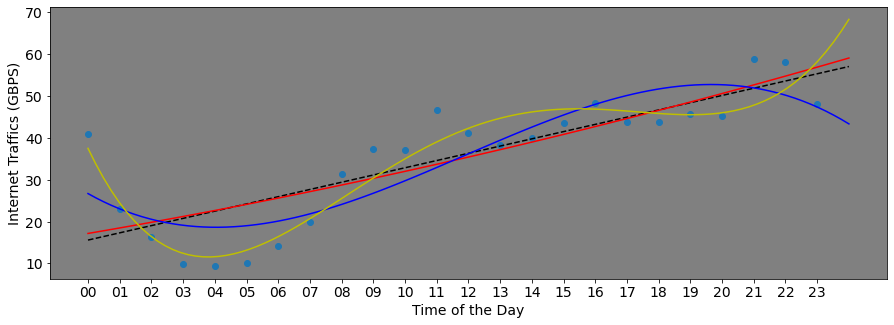

In [7]:
###
# REPLACE THE <replaceWithDegree>'s BELOW WITH 2, 3, AND THEN 4
###
poly_2 = np.polyfit(train_X, train_Y, 2)
poly_3 = np.polyfit(train_X, train_Y, 3)
poly_4 = np.polyfit(train_X, train_Y, 4)

graph.scatter(train_X, train_Y)
xp = np.linspace(0,24,100)

graph.plot(xp, np.polyval(poly_1, xp), 'k--')

graph.plot(xp, np.polyval(poly_2, xp), 'r-')

graph.plot(xp, np.polyval(poly_3, xp), 'b-')

graph.plot(xp, np.polyval(poly_4, xp), 'y-')

graph.xticks(train_X, dataset.columns.values)
graph.xlabel('Time of the Day')
graph.ylabel('Internet Traffics (GBPS)')
graph.show()

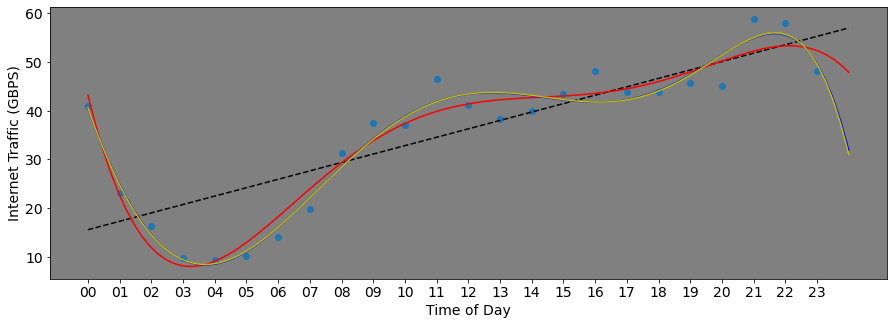

In [12]:
###
# REPLACE THE <replaceWithDegree>'s 5, 6, AND 7
###
poly_5 = np.polyfit(train_X, train_Y, 5)
poly_6 = np.polyfit(train_X, train_Y, 6)
poly_7 = np.polyfit(train_X, train_Y, 7)

#Lets plot it
graph.scatter(train_X, train_Y)
xp = np.linspace(0,24,100)

#black dashed linear degree 1
graph.plot(xp, np.polyval(poly_1,xp), 'k--')

graph.plot(xp, np.polyval(poly_5,xp), 'r-')

graph.plot(xp, np.polyval(poly_6,xp), 'b-')

graph.plot(xp, np.polyval(poly_7,xp), 'y-')

graph.xticks(train_X, dataset.columns.values)
graph.xlabel('Time of Day')
graph.ylabel('Internet Traffic (GBPS)')
graph.show()

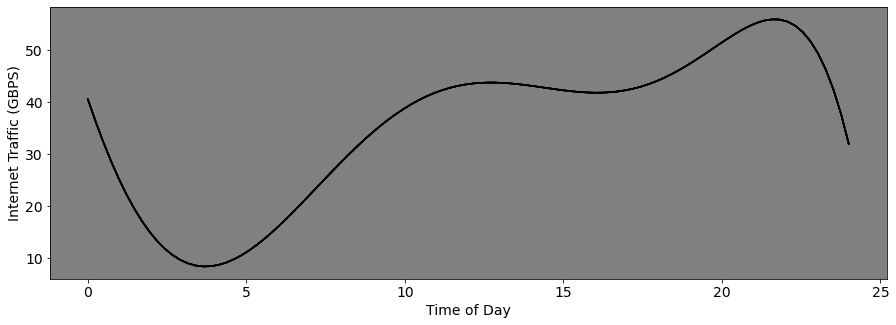

In [13]:
for row in range(0,dataset_T.shape[1]):
    graph.plot(xp, np.polyval(poly_6, xp), 'k-')

graph.xlabel('Time of Day')
graph.ylabel('Internet Traffic (GBPS)')
graph.show()

at t=12.5, predicted internet traffic is 43.70388389311783 Gbps


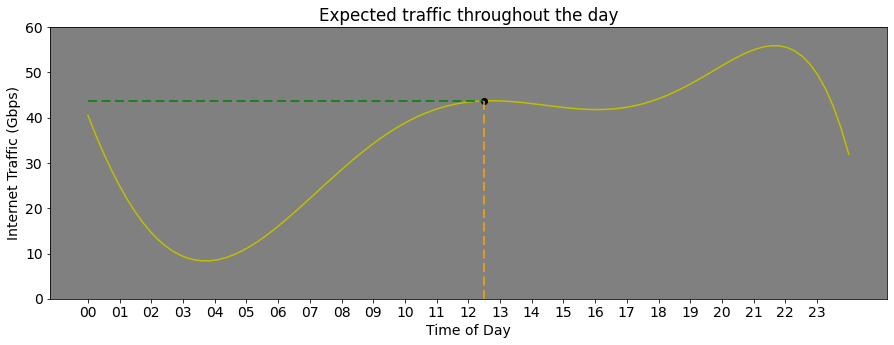

In [16]:
###
# REPLACE <replaceWithTime> BELOW WITH 12.5 (this represents the time 12:30)
###
time = 12.5
###
# REPLACE <replaceWithPoly6> BELOW WITH poly_6 SO WE CAN VISUALIZE THE 6TH DEGREE POLYNOMIAL MODEL
###
pred = np.polyval(poly_6, time)

print("at t=%s, predicted internet traffic is %s Gbps"%(time,pred))

#now let's visualize it 
graph.plot(xp, np.polyval(poly_6, xp), 'y-')

graph.plot(time, pred, 'ko') #result point 
graph.plot(np.linspace(0,time,2), np.full([2], pred), dashes=[6,3], color='green') #dashes lines (to y-axis)
graph.plot(np.full([2],time), np.linspace(0,pred,2), dashes=[6,3], color='orange') #dashes lines (to x-axis)

graph.xticks(train_X,dataset.columns.values)
graph.ylim(0,60)
graph.title('Expected traffic throughout the day')
graph.xlabel('Time of Day')
graph.ylabel('Internet Traffic (Gbps)')

graph.show()